In [80]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [81]:
# hate_data = pd.read_csv("./hate_speech_binary_dataset.csv", delimiter=",")
hate_data = pd.read_csv("./hate_speech_binary_dataset.csv", delimiter=",") 


In [82]:
hate_data[:5]

,문장,혐오 여부
0,정말 재밌다 연기도 좋고 디카프리오 짱,1
1,심쿵심쿵 미치네요이수혁땜에 잠 못자겠어요ㅠ자꾸 아른거림ㅠ,1
2,하지만 이니후빨러들은 이런거 관심 하나도 없음,0
3,@착한아이임당 A4 용지 덮고?,0
4,"진짜 평점 믿으면 안된 다는 걸 현실로 보여주는 영화입니다. 네티즌,전문가 하나같이...",1


In [83]:
hate_data.columns = ['comment', 'label_hate'] # 컬럼 명 변경

In [84]:
hate_data = hate_data.astype({'comment': 'str'})

In [85]:
hate_data.dtypes

comment       object
label_hate     int64
dtype: object

In [86]:
hate_data[:5]

,comment,label_hate
0,정말 재밌다 연기도 좋고 디카프리오 짱,1
1,심쿵심쿵 미치네요이수혁땜에 잠 못자겠어요ㅠ자꾸 아른거림ㅠ,1
2,하지만 이니후빨러들은 이런거 관심 하나도 없음,0
3,@착한아이임당 A4 용지 덮고?,0
4,"진짜 평점 믿으면 안된 다는 걸 현실로 보여주는 영화입니다. 네티즌,전문가 하나같이...",1


In [87]:
hate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190000 entries, 0 to 189999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   comment     190000 non-null  object
 1   label_hate  190000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


## 중복 및 null 처리

In [88]:
hate_data.isnull().values.any()

False

In [89]:
# 중복 제거된 개수 파악
hate_data['comment'].nunique()

187143

In [90]:
len(hate_data)

190000

In [91]:
hate_data.drop_duplicates(subset=['comment'], inplace=True)  # 중복 제거

In [92]:
len(hate_data)

187143

## 토큰화

In [94]:
x_data = hate_data['comment']
y_data = hate_data['label_hate']

In [76]:
x_data.dtypes

dtype('O')

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data) # 데이터의 각 행별로 토큰화 수행
sequences = tokenizer.texts_to_sequences(x_data)

## 희귀단어 확인

In [97]:
word_to_index = tokenizer.word_index 
word_to_index

{'영화': 1,
 '정말': 2,
 '진짜': 3,
 '너무': 4,
 'ㅋㅋ': 5,
 '이': 6,
 '다': 7,
 '더': 8,
 'ㅋㅋㅋ': 9,
 '그': 10,
 '왜': 11,
 '잘': 12,
 '수': 13,
 '그냥': 14,
 '이런': 15,
 '최고의': 16,
 '좀': 17,
 '보고': 18,
 '있는': 19,
 '존나': 20,
 '내가': 21,
 '그리고': 22,
 '근데': 23,
 '난': 24,
 'ㅇㅂ': 25,
 'ㅋ': 26,
 '다시': 27,
 'ㅋㅋㅋㅋ': 28,
 '본': 29,
 '저': 30,
 '또': 31,
 '영화를': 32,
 '역시': 33,
 '지금': 34,
 '아': 35,
 '좋은': 36,
 '이거': 37,
 '최고': 38,
 '하는': 39,
 '봤는데': 40,
 '많이': 41,
 '내': 42,
 '드라마': 43,
 '한': 44,
 '보면': 45,
 '꼭': 46,
 'ㅠㅠ': 47,
 '참': 48,
 '씨발': 49,
 '것': 50,
 '재밌게': 51,
 '와': 52,
 '영화가': 53,
 '익명': 54,
 '완전': 55,
 '없는': 56,
 '시발': 57,
 '이게': 58,
 '이렇게': 59,
 'ㅁㅈㅎ': 60,
 'ㅎㅎ': 61,
 '연기': 62,
 '영화는': 63,
 '가장': 64,
 '아니라': 65,
 '없다': 66,
 '하고': 67,
 '뭐': 68,
 '있다': 69,
 '같은': 70,
 '그래도': 71,
 'ㅋㅋㅋㅋㅋ': 72,
 '평점이': 73,
 '나도': 74,
 '보는': 75,
 '안': 76,
 '마지막': 77,
 '이건': 78,
 '봐도': 79,
 '무슨': 80,
 '말이': 81,
 'ㄹㅇ': 82,
 '다른': 83,
 '그래서': 84,
 '어떻게': 85,
 '아직도': 86,
 '할': 87,
 '대한': 88,
 '좋다': 89,
 '문재앙': 90,
 '저런': 91,
 '10점':

In [98]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 345020
단어 집합(vocabulary)에서 희귀 단어의 비율: 75.57162789373274
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 21.14897887002346


## 훈련 데이터, 테스트 데이터 분리

In [100]:
# 훈련 데이터 비율 0.8로 구성
n_of_train = int(len(sequences)*0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터 개수 : ', n_of_train)
print('테스트 데이터 개수 : ', n_of_test)

훈련 데이터 개수 :  149714
테스트 데이터 개수 :  37429


In [103]:
sequences

[[2, 127, 191, 142, 5769, 171],
 [65458, 111528, 5551, 111529, 111530],
 [95, 111531, 531, 1944, 596, 194],
 [65459, 10680, 46632, 25470],
 [3,
  102,
  14487,
  8105,
  4352,
  299,
  8955,
  463,
  164,
  5992,
  2193,
  1310,
  1120,
  111532,
  111533,
  65460,
  1,
  2395,
  102,
  1618,
  1995],
 [65461, 111534, 65462, 6205, 111535, 111536, 111537, 111538],
 [464, 13315],
 [149, 111539, 15812, 2194, 111540, 12288, 4, 1807, 102, 92, 111541],
 [3993, 2630, 1311, 111542, 13316, 65463, 35, 111543, 65464],
 [204, 1652, 6745, 94],
 [111544],
 [4471, 25471, 111545, 65465, 25472, 301, 111546, 2222, 111547, 111548, 9],
 [439, 8956, 765, 29992],
 [425, 141, 927, 117, 4105, 25473, 111549, 3617, 3, 72],
 [65466, 2025, 65467],
 [111550, 111551, 329],
 [2631, 726, 394, 2463, 549, 46633, 22162, 1066, 835, 36459, 14488],
 [3900, 2, 59, 15813, 65468, 1121, 662],
 [111552, 111553, 111554, 111555],
 [4106, 7049, 3450, 111556, 1047, 8106],
 [468,
  19589,
  920,
  361,
  492,
  15814,
  111557,
  11

문장 최대 길이 : 332
문장 평균 길이 : 8.717286


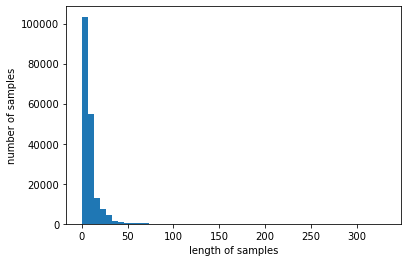

In [101]:
X_data = sequences
print('문장 최대 길이 : %d' % max(len(l) for l in X_data))
print('문장 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [102]:
max_len = 332
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (187143, 332)


In [104]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장